In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [4]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [6]:
N = 10000 # total number of rounds (users in this case who get ads shown to them)
d = 10 # total number of ads possible to be shown
ads_selected = [] # Full list of ads selected over the rounds, will eventually be a list of n elements with the nth element = to ad selected on nth round
numbers_of_selections = [0] * d # Ni(n), the number of times the ad i was sleected up to round n
sums_of_rewards = [0] * d # Ri(n), the sum of rewards of the ad i up to round n 
total_reward = 0 # total reward accumulated over the rounds 

In [12]:
# impliment the interative step by step process of UCB
import math
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

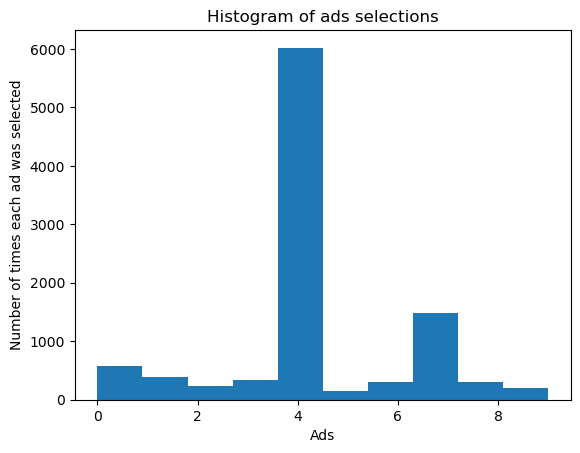

In [13]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Can change variable N to see if algorithm can identify that ad 4 had best CTR in a shorter number of rounds. But what use is that in real life? for real time implementation you would want to know that value or be able to calculate that value before letting all those ads run rather than doing is retrospectively. 

^ This is where Thompson Sampling comes in... 